# Demo of computation of NPS

## Load section

Here we load some auxiliary stripts used to make the figures and the CNN objects

In [1]:
%matplotlib inline
import os
import torch
from auxiliarFunctions import dataset_one_scan, gini_index, count_parameters
from auxiliarFunctions import imgs_w_zoom

# Scripts used for demo
from scriptsForFigures.scriptsNPS import npsOfTestedCNNs
from scriptsForFigures.scriptsDoseAndDetail import demoDoseDetailContrast

### Defining the paths where the data is fetched from

In [2]:
import os
typed = "neuro"
dataRoot = "/media/s152030/datasets/CIA/"
dataset_red =  os.path.join(dataRoot, './data/cia_%s_low.h5'%(typed) )
dataset_hig =  os.path.join(dataRoot, './data/cia_%s_full.h5'%(typed) )
dataNPS = os.path.join(dataRoot,'./data/synthetic_forNPS_Poisson_50Re.h5')
dataset_detail = os.path.join(dataRoot, "./data/synthetic_DPP.h5")

In [3]:
dataset_detail

'/media/s152030/datasets/CIA/synthetic_DPP.h5'

In [5]:
!cp /media/s152030/datasets/CIA/synthetic_forNPS_Poisson_50Re.h5 ./data/

### Loading  the trained weights to the CNNs tested in the paper

In [4]:
# Loading CNN code
from cnns.dhsn2 import dhsn2_2d
from cnns.dhsn1 import dhsn1_2d
from cnns.FBPConvNet import FBPConvNet_2d
from cnns.red import red_2d

# Instantiating networks
# DHSN2
dhsn2 = dhsn2_2d(1, 3).float().cuda()
dhsn2.load_state_dict(torch.load( "./models/dhsn2_L1_25.pyt" ))
dhsn2.eval();

# DHSN1
dhsn1 = dhsn1_2d(1, 3).float().cuda()
dhsn1.load_state_dict(torch.load( "./models/dhsn1_L1_25_new.pyt" ))
dhsn1.eval();

# FBPConvNet
fbp = FBPConvNet_2d(1, 3, 4).float().cuda()
fbp.load_state_dict(torch.load( "./models/fbpnet_max_L1_25.pyt" ))
fbp.eval();

# RED
red = red_2d(96).float().cuda()
red.load_state_dict(torch.load( "./models/ed_red_L1_25_new.pyt" ))
red.eval();

## NPS measurements

This section regenerates the images of the Noise Power Spectrum computed in 
synthetic data

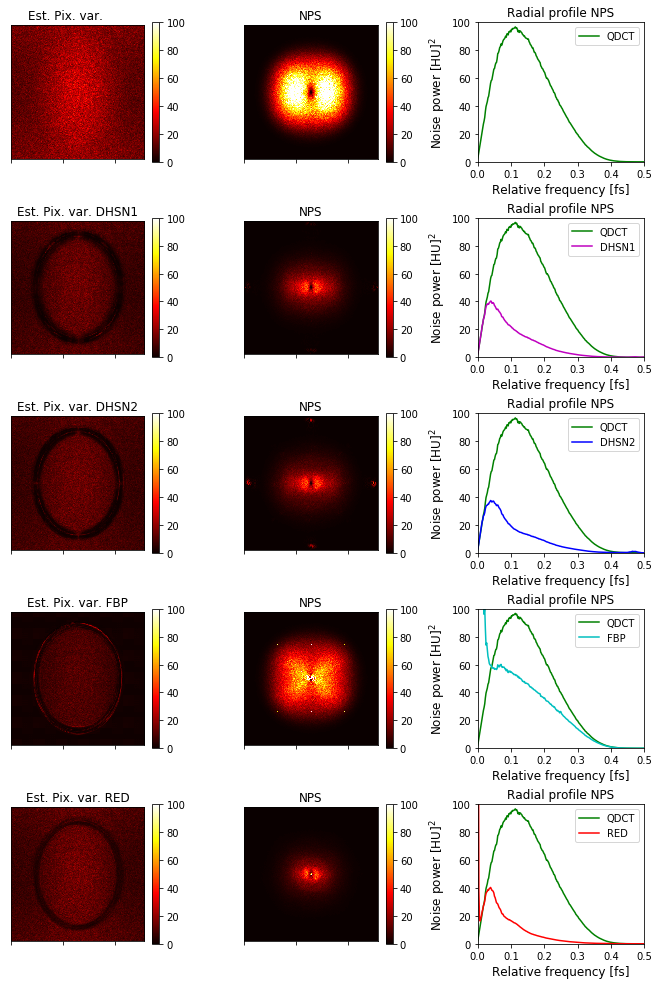

In [5]:
npsOfTestedCNNs(dataNPS, dhsn2, dhsn1, fbp, red)

## Preservation of fine structure as a function of the contrast and dose

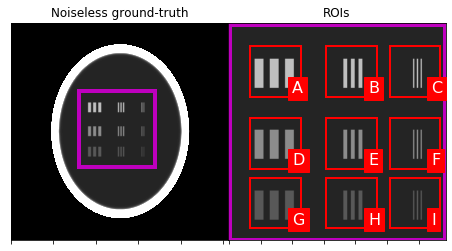

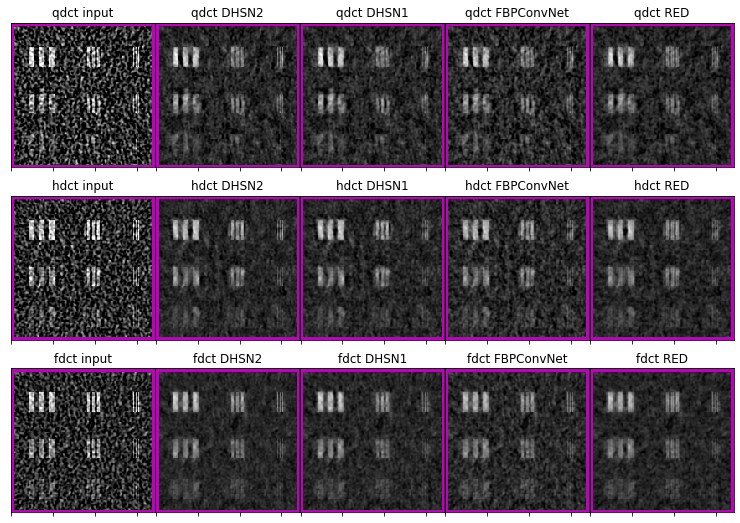



Table depicting the MSSIM for patterns with different size and contrast
ROI & qdct & DHSN2 & DHSN1 & FBPConvNet & RED \\ \midrule
A & $ 0.623 $ & $ 0.661 $ & $ 0.679 $ & $ 0.648 $ & $ 0.629 $ \\ \midrule
B & $ 0.491 $ & $ 0.593 $ & $ 0.604 $ & $ 0.583 $ & $ 0.553 $ \\ \midrule
C & $ 0.261 $ & $ 0.429 $ & $ 0.444 $ & $ 0.417 $ & $ 0.390 $ \\ \midrule
D & $ 0.366 $ & $ 0.252 $ & $ 0.295 $ & $ 0.273 $ & $ 0.253 $ \\ \midrule
E & $ 0.312 $ & $ 0.333 $ & $ 0.357 $ & $ 0.335 $ & $ 0.307 $ \\ \midrule
F & $ 0.136 $ & $ 0.196 $ & $ 0.208 $ & $ 0.188 $ & $ 0.205 $ \\ \midrule
G & $ 0.217 $ & $ 0.172 $ & $ 0.225 $ & $ 0.178 $ & $ 0.158 $ \\ \midrule
H & $ 0.185 $ & $ 0.165 $ & $ 0.208 $ & $ 0.180 $ & $ 0.161 $ \\ \midrule
I & $ 0.053 $ & $ 0.067 $ & $ 0.085 $ & $ 0.066 $ & $ 0.067 $ \\ \midrule


Table depicting the MSSIM for the displayed patch with different dose
Dose & Noisy & DHSN2 & DHSN1 & FBPConvNet & RED \\ \midrule


/home/s152030/NEXIS/dev/imageDenoising/TIP/DEMO/scriptsForFigures/scriptsDoseAndDetail.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  mssim, grad, S = ssim(sc, sc_ref, gradient=True, full=True)


qdct & $ 0.117 $ & $ 0.130 $ & $ 0.140 $ & $ 0.129 $ & $ 0.123 $ \\ \midrule
hdct & $ 0.132 $ & $ 0.135 $ & $ 0.146 $ & $ 0.135 $ & $ 0.127 $ \\ \midrule
fdct & $ 0.147 $ & $ 0.137 $ & $ 0.151 $ & $ 0.139 $ & $ 0.131 $ \\ \midrule


In [6]:
demoDoseDetailContrast(dataset_detail, dhsn2, dhsn1, fbp, red )